# **1. Perkenalan Dataset**


**Credit Card Customers Dataset**

**Sumber Dataset**:
- Diambil dari Kaggle: https://www.kaggle.com/sakshigoyal7/credit-card-customers
- Deskripsi Bisnis: Memprediksi churn pelanggan kartu kredit

**Karakteristik Dataset**:
- **Jumlah Baris**: Sekitar 10 Ribu Data (10127)
- **Jumlah Kolom**: 23 (termasuk kolom target 'Attrition_Flag')
- **Fitur Relevan**:
  - Numerikal: Customer_Age, Credit_Limit, Total_Trans_Amt
  - Kategorikal: Education_Level, Marital_Status, Card_Category
- **Ketentuan Dataset**:
  - Tidak memiliki label (kolom 'Attrition_Flag' akan dihapus untuk clustering)
  - Jumlah baris >1000
  - Mengandung data numerikal dan kategorikal
  - Bukan dataset customer segmentation


# **2. Import Library**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

In [2]:
# Load Dataset
df = pd.read_csv('BankChurners.csv')

In [3]:
# Hapus kolom ID dan target
df = df.drop(['CLIENTNUM', 'Attrition_Flag',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
             axis=1)

In [4]:
df.head(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


# **4. Exploratory Data Analysis (EDA)**


In [5]:
# Struktur Data
print("Shape:", df.shape)

Shape: (10127, 19)


In [6]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [8]:
# Numerikal Cols
num_cols = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']
print("\nDescriptive Statistics:\n", df[num_cols].describe())


Descriptive Statistics:
        Customer_Age  Credit_Limit  Total_Trans_Amt
count  10127.000000  10127.000000     10127.000000
mean      46.325960   8631.953698      4404.086304
std        8.016814   9088.776650      3397.129254
min       26.000000   1438.300000       510.000000
25%       41.000000   2555.000000      2155.500000
50%       46.000000   4549.000000      3899.000000
75%       52.000000  11067.500000      4741.000000
max       73.000000  34516.000000     18484.000000


### **Statistik Deskriptif Fitur Numerikal**

1. **Customer_Age**:
   - **Rentang Usia**: 26 - 73 tahun
   - **Rata-rata**: 46.3 tahun (±8 tahun)
   - **Distribusi**: Mayoritas pelanggan berada di rentang 41-52 tahun

2. **Credit_Limit**:
   - **Rentang**: \$1,438 - \$34,516
   - **Rata-rata**: \$8,632 (±\$9,089)
   - **Skewness Positif**: 50% pelanggan memiliki limit <\$4,549 (median << mean)

3. **Total_Trans_Amt**:
   - **Rentang Transaksi**: \$510 - \$18,484
   - **Rata-rata**: \$4,404 (±\$3,397)
   - **Pola**: 75% pelanggan menghabiskan <\$4,741 (konsumsi relatif stabil)

**Insight Awal**:
- Dataset didominasi pelanggan paruh baya (40-50 tahun)
- Variasi limit kredit sangat tinggi (std > mean)
- Kelompok kecil dengan transaksi sangat tinggi (outlier di max)

In [9]:
# Kategorikal Cols
cat_cols = ['Education_Level', 'Marital_Status', 'Card_Category']
for col in cat_cols:
    print(f"\n{col} Distribution:\n", df[col].value_counts())


Education_Level Distribution:
 Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Marital_Status Distribution:
 Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Card_Category Distribution:
 Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


### **Distribusi Fitur Kategorikal**

1. **Education_Level**:
   - **Dominasi**: Graduate (31%) & High School (20%)
   - **Data Hilang**: "Unknown" (15%) perlu di-handle
   - **Insight**: Mayoritas pelanggan berpendidikan menengah-tinggi

2. **Marital_Status**:
   - **Dominasi**: Married (46%) dan Single (39%)
   - **Kategori Minor**: Divorced (7.4%) dan Unknown (7.4%)

3. **Card_Category**:
   - **Dominasi Ekstrim**: Blue (93.5%)
   - **Kategori Premium**: Platinum hanya 0.2%

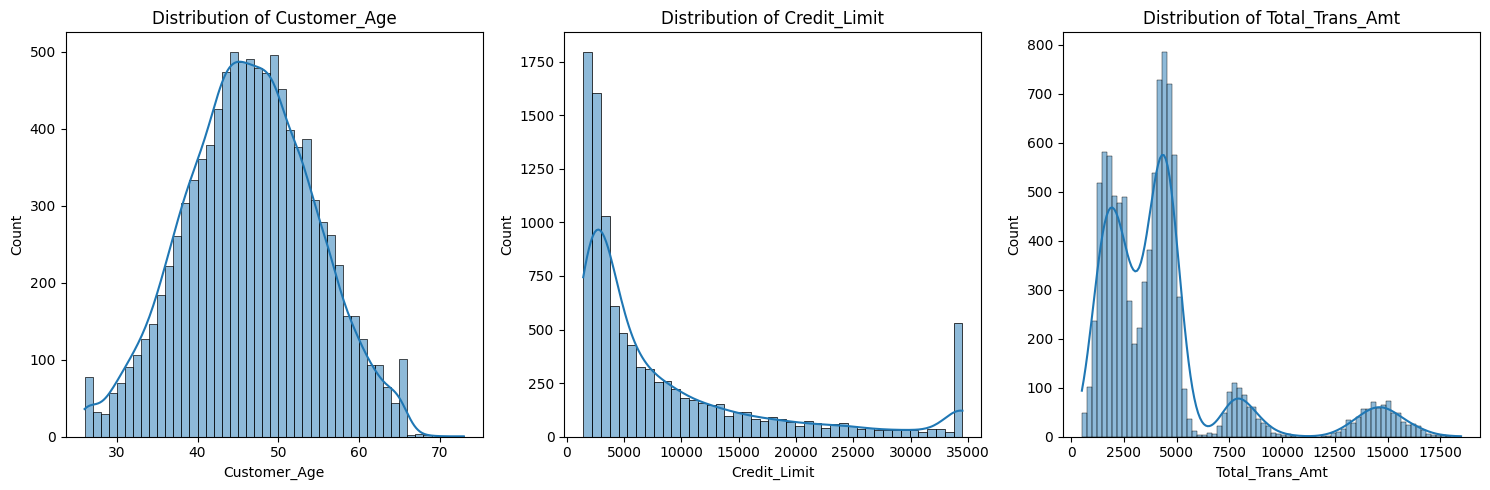

In [10]:
plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Distribusi Fitur Numerikal

Grafik di atas menunjukkan distribusi dari tiga fitur numerikal `Customer_Age`, `Credit_Limit`, dan `Total_Trans_Amt`

**Customer_Age**: Berdistribusi relatif normal, dengan mayoritas pelanggan berusia antara 40 hingga 50 tahun

**Credit_Limit**: Menunjukkan distribusi miring kanan, dengan sebagian besar pelanggan memiliki limit kredit yang relatif rendah

**Total_Trans_Amt**: Juga mengindikasikan bahwa sebagian besar pelanggan melakukan transaksi dengan jumlah yang relatif kecil

**Insight Awal**:

- Dataset didominasi oleh pelanggan paruh baya
- Terdapat variasi yang tinggi dalam limit kredit
- Sebagian besar pelanggan melakukan transaksi dengan jumlah yang relatif rendah

# **5. Data Preprocessing**

In [11]:
# Handling Missing Values
df['Education_Level'] = df['Education_Level'].fillna('Unknown')
df['Marital_Status'] = df['Marital_Status'].fillna('Unknown')

In [12]:
# Encoding Kategorikal
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [13]:
# Standar scaler (numeric)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [14]:
# Pemilihan Fitur
X = df[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Education_Level']]

## **b. Evaluasi Model Clustering**

In [15]:
# Menentukan Jumlah Cluster Optimal dengan Silhouette Scores
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"For n_clusters={k}, Silhouette Score={score:.3f}")

For n_clusters=2, Silhouette Score=0.386
For n_clusters=3, Silhouette Score=0.259
For n_clusters=4, Silhouette Score=0.278
For n_clusters=5, Silhouette Score=0.298


## **c. Training Model**

In [16]:
# Training Model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

## **d. Visualisasi Hasil Clustering**

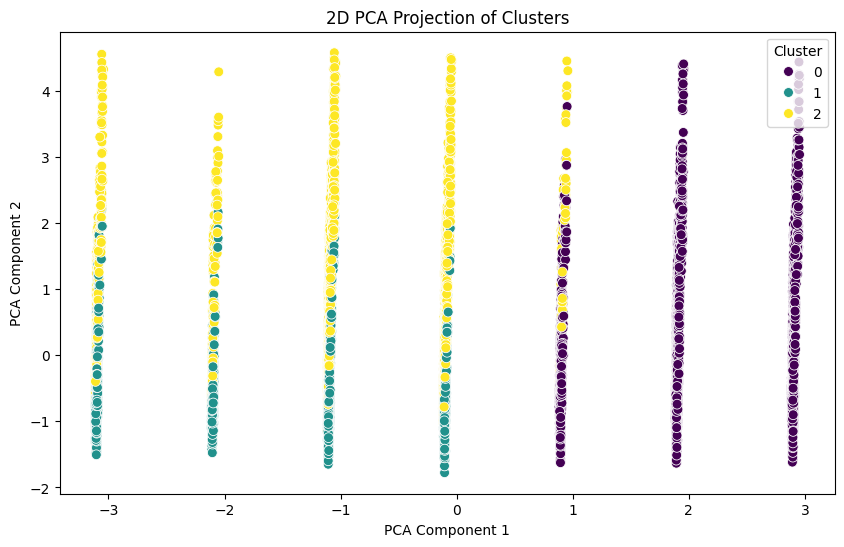

In [17]:
# Visualisasi Hasil Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='viridis', s=50)
plt.title('2D PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [18]:
# Inverse Transform
df_original = pd.read_csv('BankChurners.csv').drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
df_original['Cluster'] = clusters

In [19]:
# Agregasi Numerikal
cluster_analysis = df_original.groupby('Cluster').agg({
    'Customer_Age': ['mean', 'min', 'max'],
    'Credit_Limit': ['mean', 'min', 'max'],
    'Total_Trans_Amt': ['mean', 'min', 'max'],
    'Education_Level': lambda x: x.mode()[0]
}).reset_index()

In [20]:
# Interpretasi
for cluster in range(3):
    print(f"\n**Cluster {cluster}**:")
    print(f"- Rata-rata Usia: {cluster_analysis.iloc[cluster]['Customer_Age']['mean']:.1f} tahun")
    print(f"- Rata-rata Limit Kredit: ${cluster_analysis.iloc[cluster]['Credit_Limit']['mean']:,.0f}")
    print(f"- Pendidikan Dominan: {cluster_analysis.iloc[cluster]['Education_Level']}")


**Cluster 0**:
- Rata-rata Usia: 46.5 tahun
- Rata-rata Limit Kredit: $8,577
- Pendidikan Dominan: <lambda>    Unknown
Name: 0, dtype: object

**Cluster 1**:
- Rata-rata Usia: 51.5 tahun
- Rata-rata Limit Kredit: $5,554
- Pendidikan Dominan: <lambda>    Graduate
Name: 1, dtype: object

**Cluster 2**:
- Rata-rata Usia: 40.8 tahun
- Rata-rata Limit Kredit: $11,888
- Pendidikan Dominan: <lambda>    Graduate
Name: 2, dtype: object


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Usia:** 46.5 tahun  
- **Rata-rata Limit Kredit:** $8,577  
- **Pendidikan Dominan:** Unknown  
- **Analisis:** Cluster ini merepresentasikan pelanggan dengan usia menengah dan limit kredit. Dominasi pendidikan "Unknown" menunjukkan kemungkinan data yang belum tercatat dengan baik. Kelompok ini mungkin membutuhkan perhatian untuk melengkapi data profil mereka

## Cluster 1:
- **Rata-rata Usia:** 51.5 tahun  
- **Rata-rata Limit Kredit:** $5,554  
- **Pendidikan Dominan:** Graduate  
- **Analisis:** Cluster ini terdiri dari pelanggan usia matang dengan limit kredit relatif rendah meskipun berpendidikan tinggi (Graduate). Mereka mungkin merupakan kelompok yang terbiasa dalam penggunaan kartu kredit atau baru beralih dari kartu dasar (Blue) ke kategori lebih tinggi

## Cluster 2:
- **Rata-rata Usia:** 40.8 tahun  
- **Rata-rata Limit Kredit:** $11,888  
- **Pendidikan Dominan:** Graduate  
- **Analisis:** Kelompok usia lebih muda dengan limit kredit tinggi dan pendidikan baik. Mereka merupakan target potensial untuk program loyalitas premium karena menunjukkan kapasitas finansial yang kuat dan mungkin aktif dalam transaksi

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [21]:
# Mengeksport Data
df.to_csv('clustering_result.csv', index=False)